In [142]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.optimize import least_squares
from scipy.optimize import fmin


In [143]:
file=pd.read_csv(r'Data\5L_532_600_50x_0_80 NIR_100_500_25%_2.txt', delimiter='\t', header=None, names=['x',  'Intensity'] )

file=file[file['x']>1000]
file=file[file['x']<1450]
file=file.reset_index()


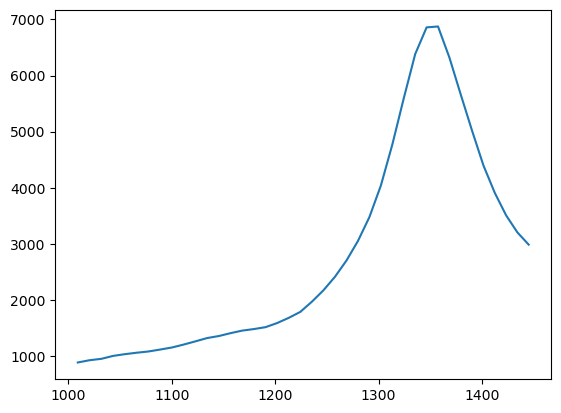

In [144]:
plt.plot(file['x'], file['Intensity'])

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.7629e+02                                    8.24e-07    
       1              2         2.4525e+02      3.10e+01       2.26e+03       8.13e-02    
       2              5         1.6375e+02      8.15e+01       2.82e+02       4.76e-02    
       3              7         1.4650e+02      1.72e+01       1.41e+02       1.67e+00    
       4              8         1.4226e+02      4.25e+00       2.82e+02       1.31e+00    
       5             10         1.0127e+02      4.10e+01       1.77e+01       5.09e-01    
       6             11         9.2847e+01      8.43e+00       3.53e+01       1.11e+00    
       7             12         8.4333e+01      8.51e+00       7.06e+01       7.69e+00    
       8             15         7.9853e+01      4.48e+00       4.41e+00       2.58e+00    
       9             16         7.5725e+01      4.13e+00       1.10e+00       2.33e+00    

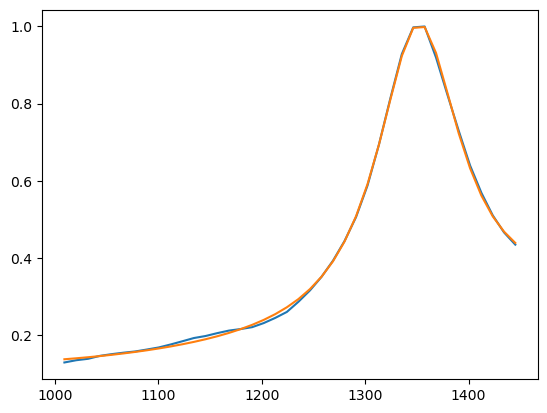

In [173]:
def lorentzian( x, x0, a, gam ):
    return a * gam**2 / ( gam**2 + ( x - x0 )**2)

def multi_lorentz( x, params ):
    off = 1000
    paramsRest = params
    #assert not ( len( paramsRest ) % 3 )
    return off + sum( [ lorentzian( x, *paramsRest[ i : i+3 ] ) for i in range (0, len( paramsRest ), 3 ) ] )
def res_multi_lorentz( params, xData, yData ):
    diff = [ multi_lorentz( x, params ) - y for x, y in zip( xData, yData ) ]
    return diff

xData=file['x']
yData=file['Intensity']
yData = yData / max(yData)

generalWidth = 1

yDataLoc = yData
startValues = [ max( yData ) ]
counter = 0

#while max( yDataLoc ) - min( yDataLoc ) > .1:
    
    
minP = np.argmin( yDataLoc )
minY = yData[ minP ]   
#print('lc1')
startValues = [ help_[0], minY - max( yDataLoc ), generalWidth , help_[0], minY - max( yDataLoc ), generalWidth ]
popt= least_squares( res_multi_lorentz, startValues, args=( xData, yData ), verbose=2, max_nfev=99999999, loss='cauchy' )
#yDataLoc = [ y - multi_lorentz( x, popt ) for x,y in zip( xData, yData ) ]

testData = [ multi_lorentz(x, popt['x'] ) for x in xData ]

fig = plt.figure()
ax = fig.add_subplot( 1, 1, 1 )
ax.plot( xData, yData )
ax.plot( xData, testData )
plt.show()


In [167]:
print( popt['x'])

[ 8.95004092e+02 -9.99885410e+02  4.42611725e+04  1.35152203e+03
  7.86147579e-01  4.91308038e+01]


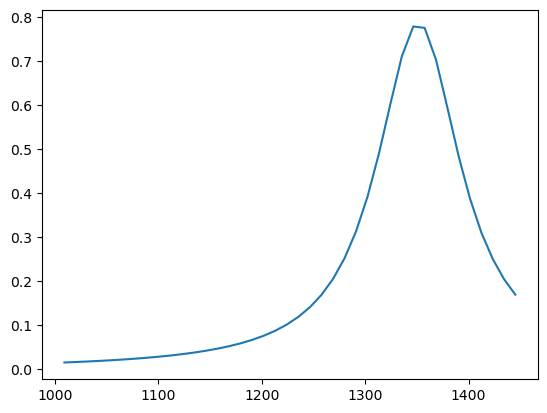

In [171]:
#plt.plot(xData, lorentzian(xData, 8.95004092e+02, -9.99885410e+02,  4.42611725e+04))
plt.plot(xData, lorentzian(xData, 1.35152203e+03, 7.86147579e-01,  4.91308038e+01))

In [ ]:
popt['x']

c:\Users\johan\.conda\envs\physics\lib\site-packages\scipy\optimize\_minpack_py.py:494: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


[ 1.40023884e+00 -1.22111378e+07 -3.68425939e+04 -6.35799523e+04
 -2.35346156e+04  3.32519506e+01  1.76131404e+00]


c:\Users\johan\.conda\envs\physics\lib\site-packages\scipy\optimize\_minpack_py.py:494: RuntimeWarning: Number of calls to function has reached maxfev = 1600.
  warnings.warn(errors[info][0], RuntimeWarning)


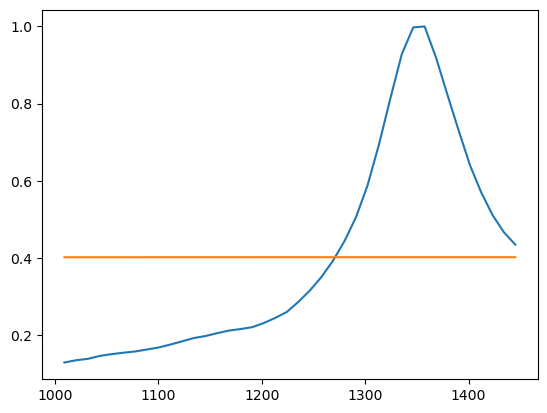

In [152]:
help_=[1598,1346]

def lorentzian( x, x0, a, gam ):
    return a * gam**2 / ( gam**2 + ( x - x0 )**2)

def multi_lorentz( x, params ):
    off = params[0]
    paramsRest = params[1:]
    assert not ( len( paramsRest ) % 3 )
    return off + sum( [ lorentzian( x, *paramsRest[ i : i+3 ] ) for i in range (0, len( paramsRest ), 3 ) ] )

def res_multi_lorentz( params, xData, yData ):
    diff = [ multi_lorentz( x, params ) - y for x, y in zip( xData, yData ) ]
    return diff

xData=file['x']
yData=file['Intensity']
yData = yData / max(yData)

generalWidth = 1

yDataLoc = yData
startValues = [ max( yData ) ]
counter = 0

while max( yDataLoc ) - min( yDataLoc ) > .1:
    counter += 1
    if counter > 2: ### max 20 peak...emergency break to avoid infinite loop
        #print('lc')
        break
    minP = np.argmin( yDataLoc )
    minY = yData[ minP ]
    

    if counter<len(help_):
        x0=help_[counter-1]
    else:
        x0 = xData[ minP ]
    #print('lc1')
    startValues += [ x0, minY - max( yDataLoc ), generalWidth ]
    popt, ier = leastsq( res_multi_lorentz, startValues, args=( xData, yData ))
    yDataLoc = [ y - multi_lorentz( x, popt ) for x,y in zip( xData, yData ) ]

print (popt)
testData = [ multi_lorentz(x, popt ) for x in xData ]

fig = plt.figure()
ax = fig.add_subplot( 1, 1, 1 )
ax.plot( xData, yData )
ax.plot( xData, testData )
plt.show()

In [ ]:
functions={}

totel=[]

class Lorentzian_function:
    generalWidth=1

    def __init__(self, x0, minY, yDataLoc):
        self.x0=x0
        self.minY=minY
        self.yDataLoc=yDataLoc

def CreateLorentzianFunctions(n, x0, minY, yDataLoc):
    global functions
    for index_1 in range (n):
        functions['clss'+str(index_1)]=Lorentzian_function(x0, minY, yDataLoc)
#CreateLorentzianFunctions(4, x0, minY, yDataLoc)

def lorentzian( x, x0, a, gam ):
    return a * gam**2 / ( gam**2 + ( x - x0 )**2)

def multi_lorentz( x, params ):
    off = params[0]
    paramsRest = params[1:]
    #assert not ( len( paramsRest ) % 3 )
    params_verf= [  paramsRest] 
    totel.append(paramsRest)
    return off + sum( [ lorentzian( x, *paramsRest[ i : i+3 ] ) for i in range (0, len( paramsRest ), 3 ) ] )


lista={}
for index in range (5):
    lista[index]={}
    lista[index]['x']=[]
    lista[index]['y']=[]


def multi_lorentz2( x, params ):
    off = params[0]
    paramsRest = params[1:]
    #assert not ( len( paramsRest ) % 3 )
    params_verf= [  paramsRest] 
    totel.append(paramsRest)
    #return_data=off + sum( [ lorentzian( x, *paramsRest[ i : i+3 ] ) for i in range (0, len( paramsRest ), 3 ) ] )
    i=0
    var_number=len(totel)
    #print(var_number)
    

    while i<(len(paramsRest)):
        return_data=lorentzian( x, paramsRest[i], paramsRest[i+1], paramsRest[i+2])
        #print(x)
        #print(return_data)
        if not (x in lista[0]['x']):
            lista[0]['x'].append(x)
            lista[0]['y'].append(return_data)
        else:
            if not (x in lista[1]['x']):
                lista[1]['x'].append(x)
                lista[1]['y'].append(return_data)
            else:
                if not (x in lista[2]['x']):
                    lista[2]['x'].append(x)
                    lista[2]['y'].append(return_data)
                else:
                    if not (x in lista[3]['x']):
                        lista[3]['x'].append(x)
                        lista[3]['y'].append(return_data)
                    else:
                        if not (x in lista[4]['x']):
                            lista[4]['x'].append(x)
                            lista[4]['y'].append(return_data)


                

        i=i+3
        #fig1=plt.figure()
        plt.plot(lista[0]['x'],lista[0]['y'])
        #fig1=plt.figure()
        plt.plot(lista[1]['x'],lista[1]['y'])
        plt.plot(lista[2]['x'],lista[2]['y'])
        plt.plot(lista[3]['x'],lista[3]['y'])
        plt.plot(lista[4]['x'],lista[4]['y'])
        #print(lista)
    return_data=return_data+off
    #plt.plot(x, return_data)
    return off + sum( [ lorentzian( x, *paramsRest[ i : i+3 ] ) for i in range (0, len( paramsRest ), 3 ) ] )



def res_multi_lorentz( params, xData, yData ):
    diff = [ multi_lorentz( x, params ) - y for x, y in zip( xData, yData ) ]
    return diff

xData=file['x']
yData=file['Intensity']
yData = yData / max(yData)

generalWidth = 1

yDataLoc = yData
startValues = [ max( yData ) ]
counter = 0
poptl=[]
#print(max( yDataLoc ) - min( yDataLoc ))

while max( yDataLoc ) - min( yDataLoc ) > .1:
    counter += 1
    if counter < 20: ### max 20 peak...emergency break to avoid infinite loop
        break
    minP = np.argmin( yDataLoc )
    minY = yData[ minP ]
    if counter<len(help_):
        x0=help_[counter-1]
    else:
        x0 = xData[ minP ]
    functions['clss'+str(counter-1)].x0=x0
    functions['clss'+str(counter-1)].minY=minY
    functions['clss'+str(counter-1)].yDataLoc=yDataLoc
    startValues += [ x0, minY - max( yDataLoc ), generalWidth ]
    popt, ier = leastsq( res_multi_lorentz, startValues, args=( xData, yData ) )
    yDataLoc = [ y - multi_lorentz( x, popt ) for x,y in zip( xData, yData ) ]
    poptl.append(popt)

print (popt)


testData = [ multi_lorentz2(x, popt ) for x in xData ]

fig = plt.figure()
ax = fig.add_subplot( 1, 1, 1 )
ax.plot( xData, yData )
ax.plot( xData, testData )
plt.show()

In [ ]:
lorentz_indv_data

In [ ]:
totel[-1]

In [ ]:
xx1=lorentzian(xData, totel[-1][0],totel[-1][1],totel[-1][2])
xx2=lorentzian(xData, totel[-1][3],totel[-1][4],totel[-1][5])
xx3=lorentzian(xData, totel[-1][6],totel[-1][7],totel[-1][8])
xx4=lorentzian(xData, totel[-1][9],totel[-1][10],totel[-1][11])

In [ ]:
suma=min(yData)+min(xx3)
plt.plot(xData, -xx3)
plt.plot(xData, yData)

In [ ]:
plt.plot(xData,xx1)

In [ ]:
poptl

In [ ]:
testData = multi_lorentz(xData, [poptl[1][3],poptl[1][4],poptl[1][5],poptl[1][6]])

In [ ]:
fig = plt.figure()
ax = fig.add_subplot( 1, 1, 1 )
ax.plot( xData, yData )
ax.plot( xData, testData )
plt.show()

In [ ]:
#plt.plot(xData, yData)
for index_1 in range (3):   
    plt.plot(xData, lorentzian(xData, functions['clss'+str(index_1)].x0, functions['clss'+str(index_1)].minY, pd.Series(functions['clss'+str(index_1)].yDataLoc)))


In [ ]:
functions['clss1'].x0

In [ ]:
CreateLorentzianFunctions(4, x0, minY, yDataLoc)

In [ ]:
type(functions['clss0'].yDataLoc)

In [ ]:
popt[:3]

In [ ]:
plt.plot(xData, lorentzian(xData, functions['clss1'].x0, functions['clss1'].minY, functions['clss1'].yDataLoc))

In [ ]:
list(file['x'])[0]